# Link the the blog post:
https://medium.com/@DhananjayYelwande/stack-overflow-developer-survey-2019-key-trends-9042f73d5acc?sk=40b078e9814e2931050e579d203c6114

---

# Data Science Methodology

This project is going to follow the CRISP-DM methodology.

CRISP-DM stands for cross-industry process for data mining.

CRISP-DM is a robust and well known methodology.

CRISP-DM methodology provides a structured approach to planning a data mining project.

---

 CRISP-DM includes the following processes:

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

---


## 1. Business Understanding

---

With 88,000 responses fielded from over 170 countries and dependent territories, Stack Overflow Annual Developer Survey continues to be the most comprehensive survey of software developers ever conducted. The survey covers aspects such as career satisfaction and job search to programming languages.

In this project, the survey results will be used to answer the following questions for aspiring data scientists:

- Which country contributed the most to the survey?
- What's the pay for developers like?
- What is the framework of choice for developers?

-------

**Summary of Results:**

After analyzing the data, we found that:

- Developers from United States contributed most to the survey.
- The United States gives by far the highest of salaries of any nation.
- Surprisingly, jQuery is the web framework of choice.

For more details, please refer to the the full analysis below.

----


## 2. Data Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data using pandas
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
# Using the describe function to get an overall insight into the data
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [5]:
# Shape of the dataframe
df.shape

(88883, 85)

In [6]:
# First five rows from schema
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [7]:
# Shape of schema
schema.shape

(85, 2)

In [8]:
# Gets info about columns, data types and value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [9]:
# check columns with no missing values
set(df.isna().sum()[df.isna().sum()==0].keys())

{'Hobbyist', 'OpenSourcer', 'Respondent'}

In [10]:
# check which columns have over 50% missing values
set(df.columns[100*df.isna().sum()/df.shape[0] > 0])

{'Age',
 'Age1stCode',
 'BetterLife',
 'BlockchainIs',
 'BlockchainOrg',
 'CareerSat',
 'CodeRev',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'Containers',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Dependents',
 'DevEnviron',
 'DevType',
 'EdLevel',
 'EduOther',
 'Employment',
 'EntTeams',
 'Ethnicity',
 'Extraversion',
 'FizzBuzz',
 'Gender',
 'ITperson',
 'ImpSyn',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'LastHireDate',
 'LastInt',
 'MainBranch',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'OffOn',
 'OpSys',
 'OpenSource',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'ResumeUpdate',
 'SOAccount',
 'SOComm',
 'SOFindAnswer',
 'SOHowMuchTime',
 'SOJobs',
 'SONewContent',
 'SOPartFreq',
 'SOTimeSaved',
 'SOVisit1st',
 'SOVisitFreq',
 'SOVisitTo',
 'ScreenName',
 'Sexual

In [11]:
# check which columns have over 30% missing values
set(df.columns[100*df.isna().sum()/df.shape[0] > 25
              ])

{'BlockchainIs',
 'BlockchainOrg',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'UnitTests',
 'WebFrameDesireNextYear',
 'WebFrameWorkedWith',
 'WorkWeekHrs'}

In [12]:
# check is we have missing schemas
np.sum(schema.isnull())

Column          0
QuestionText    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE53010A58>,
      dtype=object)

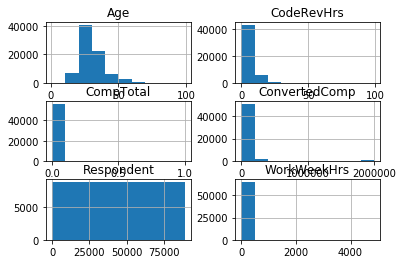

In [13]:
df.hist()

# 3. Data Preparation, Modelling and Evaluation


---

### 1. Finding out which country contributed the most to the survey:

 The Top 3 are: 
 
 - United States
 
 - India
 
 - Germany.

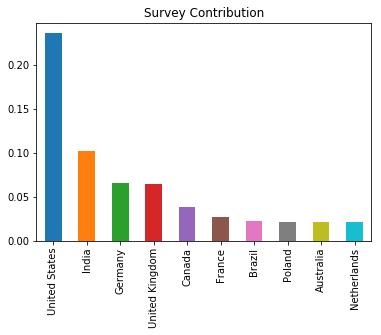

In [14]:
# Visualize the data
#Provide a pandas series of the counts for the country
count_values = df.Country.value_counts()

#Displays the top 10 most contributing countries
(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Survey Contribution");

### 2. Finding out the payment for developers by country:

In [18]:
salaries_df = df[['DevType', 'Country','ConvertedComp']]

for column in salaries_df.columns.tolist():
    col_desc = schema[schema['Column']==column]['QuestionText'].iloc[0]
    print(col_desc)

Which of the following describe you? Please select all that apply.
In which country do you currently reside?
Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.


In [21]:
# drop rows with missing values from salaries df
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,index,DevType,Country,ConvertedComp
0,2,"Designer;Developer, back-end;Developer, front-...",Thailand,8820.0
1,3,"Developer, full-stack",United States,61000.0
2,5,Data or business analyst;Data scientist or mac...,Canada,366420.0
3,8,"Database administrator;Developer, back-end;Dev...",New Zealand,95179.0
4,9,Data or business analyst;Data scientist or mac...,India,13293.0


In [22]:
# First lets make a count of developer by country
clean_salaries_df.Country.value_counts()

United States                            14756
United Kingdom                            3967
India                                     3953
Germany                                   3734
Canada                                    2225
France                                    1619
Brazil                                    1395
Poland                                    1307
Australia                                 1233
Spain                                     1189
Netherlands                               1184
Russian Federation                        1095
Italy                                      932
Sweden                                     901
Switzerland                                663
Israel                                     569
Ukraine                                    535
Austria                                    500
Turkey                                     496
Czech Republic                             477
Mexico                                     457
Belgium      

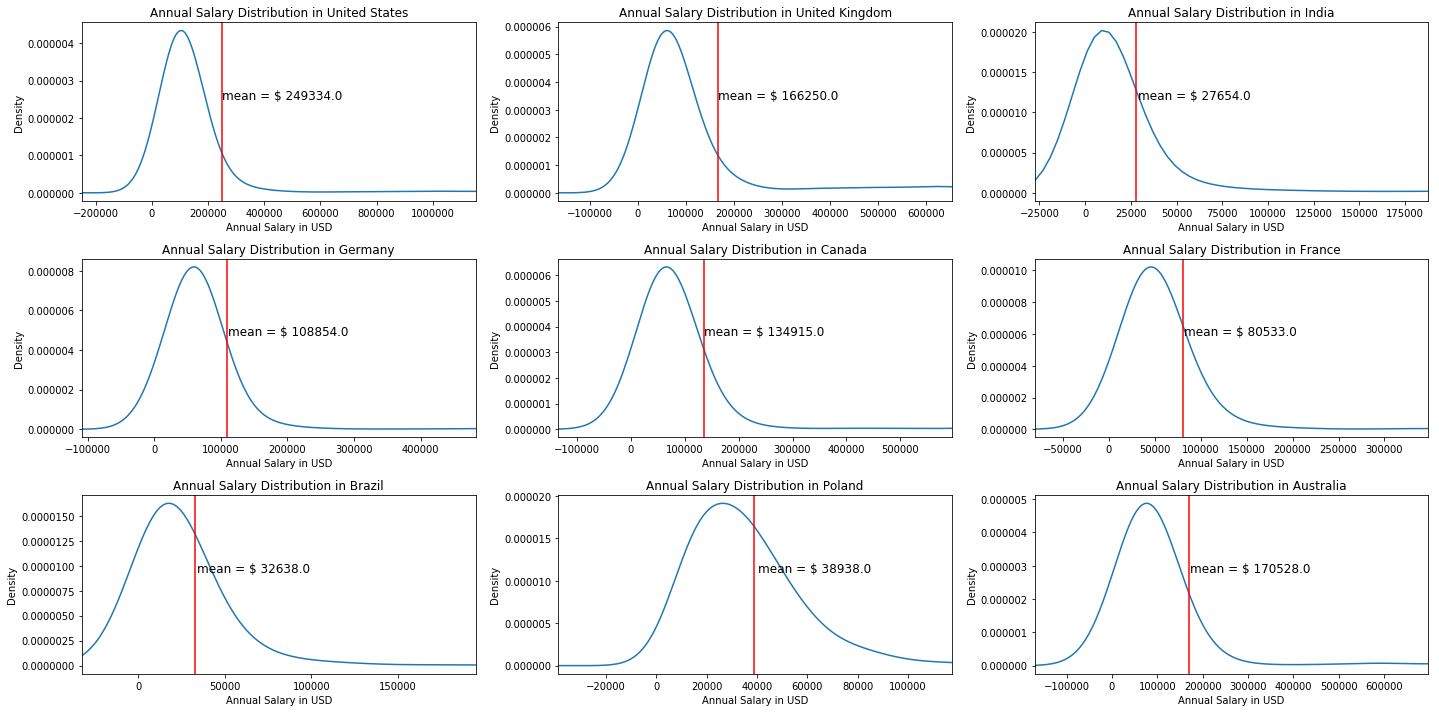

In [49]:
#Now lets plot salary distributions for the top 10 countries
# And Visualize the data
fig = plt.figure(figsize=(20,10))
countries = clean_salaries_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()


---

The US has by far the highest salaries!

---


### 3. Finding out the framework of choice for developers:

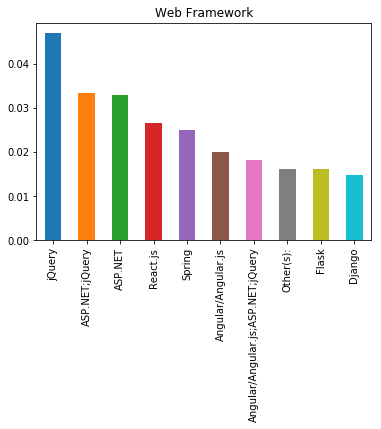

In [44]:
#Visualize the Data
#Provide a pandas series of the counts for each LanguageWorkedWith
count_values = df.WebFrameWorkedWith.value_counts()

#display the top 10
(count_values[:10]/df.shape[0]).plot(kind="bar");
plt.title("Web Framework");


### Conclusion:

In this notebook we did the analysis about developers from Stack Overflow Survey Data 2019, and these are the summary of what we have done.

1. We measure the survey participation for each country and found that United States has the highest participation level in the world.

2. We then looked at developers count by country and salary distribution. The United States has by far the highest salaries.

3. Finally, We found out that developers' framework of choice is JQuery.
